### Halo Formation

Identifying collapsed structures is an important task for any simulation of large-scale structure since this is where star formation will take place. A direct approach involves measuring the non-linear density to high resolution within an N-body simulation. However this requires a large amount of computational resources, and we often require a model which can produce populations of collapsed halos without running a simulation.

Bond et al (1991) devised a model which predicts the distribution of collapsed structures based entirely on the initial conditions of the universe. The initial density field is smoothed sucessively from large to small scales and halos are placed wherever the smoothed density field first exceeds a "Barrier", defined by spherical collapse models.

In [1]:
#load in some functions we will use to calculate the random walks
import sys
sys.path.insert(0,'.')
import randomwalks as rw #you can find this module in the same directory as this notebook if you want to see how it works
from py21cmfast.wrapper.cfuncs import get_growth_factor #we use 21cmfast for some basic cosmology functions
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [2]:
#set up parameters for the random walks
redshift = 5.0
growthf = np.array([get_growth_factor(redshift=redshift, inputs=rw.default_p21c_inputs)])

#set up limits / steps for the mass range we want to sample
min_mass = 1e8 #solar masses
max_mass = 1e16
num_steps = 100 #number of log-spaced steps in mass for the random walks

sigma_steps,mass_steps = rw.setup_walk_steps(start_sigma=0.0,
                                             min_mass=min_mass,
                                             max_mass=max_mass,
                                             num_steps=num_steps)

#number of walks total
n_walks = 100000

def my_random_walk(sigma_steps, n_walks, start_delta=0.):
    pass

#do the walks
#TODO: replace these function calls with the ones they write above
walks = rw.random_steps_sharpk(sigma_steps,n_walks,start_delta=0.) #TODO: get them to write this function above

Now that the random walks are done, we will visualise them on their own

(<Figure size 600x400 with 1 Axes>,
 array([<Axes: xlabel='$\\sigma (M)$', ylabel='$\\delta$'>], dtype=object))

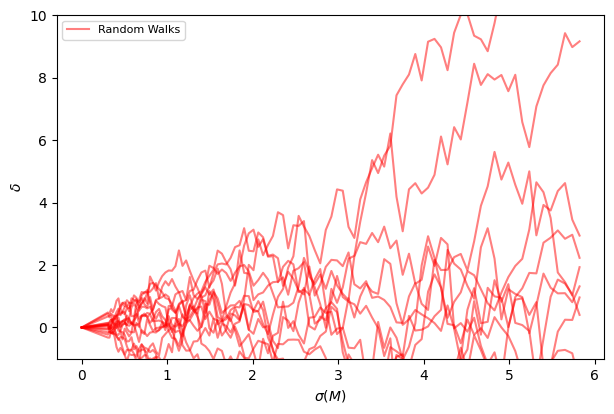

In [3]:
rw.plot_walks(
    redshift=redshift,
    walks=walks,
    mass_steps=mass_steps,
    sigma_steps=sigma_steps,
    n_walks_plot=15,
)

Now that our random walks are set, we define a barrier for halo formation. The simplest choice is the Press-Schechter `d_crit = 1.686/D(z)`

In [4]:
def my_barrier_PS(sigma_steps, growthf):
    """ Write a function to compute the Press-Schechter barrier here."""
    pass

#Set up the Barrier
#TODO: replace these function calls with the ones they write above
barrier_steps = rw.barrier_PS(sigma_steps, growthf)

def my_crossing_points(delta_arr, barrier):
    """ Write a function to compute the crossing points here. given an array of random walks and a barrier."""
    pass

#find at which indices the random walks cross the barrier
#TODO: replace these function calls with the ones they write above
halo_masses, halo_sigma, crossing_points = rw.get_crossing_points(
    delta_arr=walks,
    barrier=barrier_steps,
    sigma_arr=sigma_steps,
    mass_arr=mass_steps,
)

Now we plot the random walks with their barrier crossing, which determines the population of halos masses

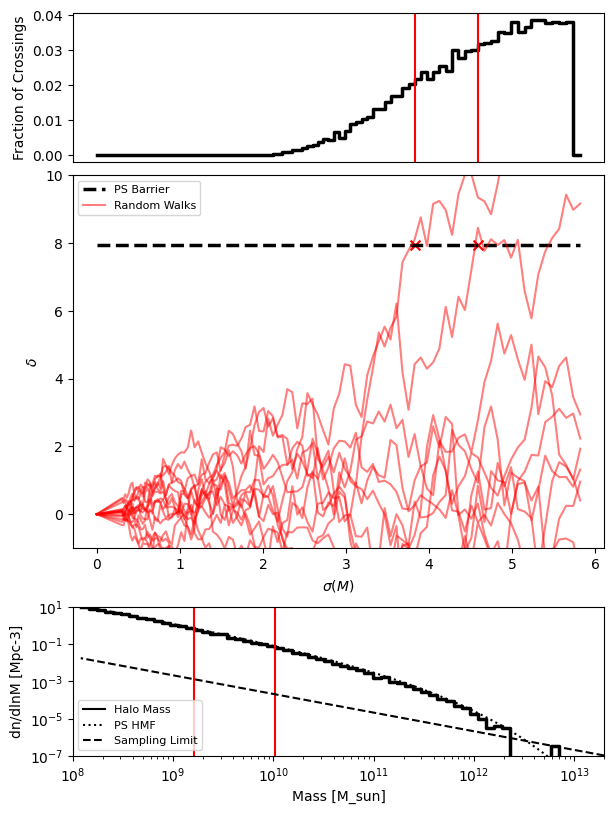

In [5]:
_ = rw.plot_walks(
    walks=walks,
    redshift=redshift,
    mass_steps=mass_steps,
    sigma_steps=sigma_steps,
    barrier=barrier_steps,
    halo_masses=halo_masses,
    halo_sigma=halo_sigma,
    n_walks_plot=15, #change this to plot more or less walks
    hmf_type='PS',
    plot_crossings=True,
)

Here red vertical lines show the mass/sigma of the randomly selected walks which cross the barrier at some point, and the dotted line in the bottom panel shows the expected Press-Schecter collapsed mass fraction.

Repeating with a different barrier gives us a different set of masses

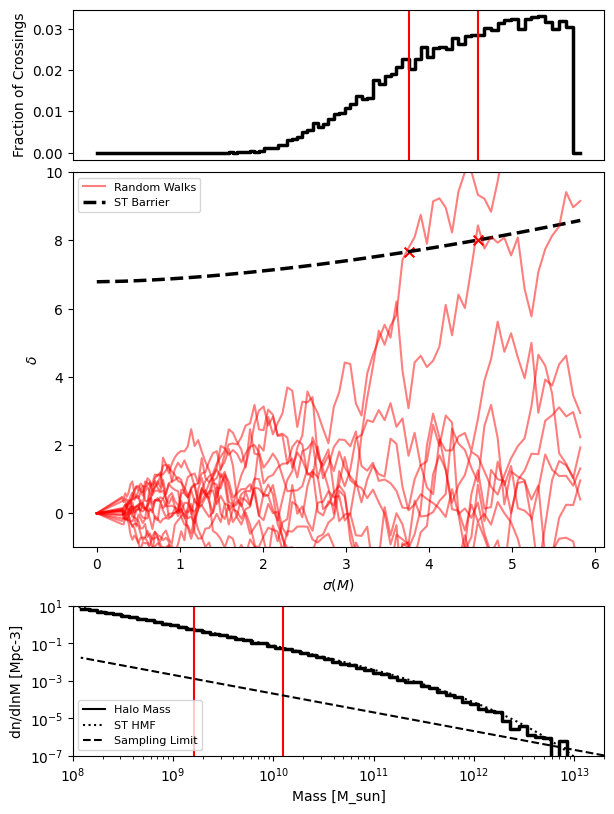

In [6]:
def my_barrier_ST(sigma_steps, growthf):
    """ Write a function to compute the Sheth-Tormen barrier here.
    Note that you can change the parameters of the mass function to achieve different results.
    """
    pass

#Set up the Barrier
#TODO: replace these function calls with the ones they write above
barrier_steps_ST = rw.barrier_ST(sigma_steps, growthf)

#TODO: replace these function calls with the ones they write above
halo_masses_ST, halo_sigma_ST, crossing_points_ST = rw.get_crossing_points(
    delta_arr=walks,
    barrier=barrier_steps_ST,
    sigma_arr=sigma_steps,
    mass_arr=mass_steps,
)

_ = fig, ax = rw.plot_walks(
    walks=walks,
    redshift=redshift,
    mass_steps=mass_steps,
    sigma_steps=sigma_steps,
    barrier=barrier_steps_ST,
    halo_masses=halo_masses_ST,
    halo_sigma=halo_sigma_ST,
    n_walks_plot=15, #change this to plot more or less walks
    hmf_type='ST',
    plot_crossings=True
)

### Conditioning
The mass functions we have made so far deal with the entire universe, i.e. a region at mean density (`delta == 0`) and effectively infinite size (`sigma == 0`). But this is not necessarily required. We can calculate the expected halo mass distribution in a region of any size and density simply by starting the random walks at that location in the `delta`-`sigma` diagram.

In [ ]:
# This cell performs random walks at a few different conditions
# TODO: You can modify these starting masses and deltas to see how the halo mass function changes
sigma_12, mass_12 = rw.setup_walk_steps(start_mass=1e12,
                                        min_mass=min_mass,
                                        max_mass=max_mass,
                                        num_steps=num_steps)
sigma_15, mass_15 = rw.setup_walk_steps(start_mass=1e15,
                                        min_mass=min_mass,
                                        max_mass=max_mass,
                                        num_steps=num_steps)
walks_overdense_12 = rw.random_steps_sharpk(sigma_12, n_walks=n_walks, start_delta=1./growthf)
walks_underdense_15 = rw.random_steps_sharpk(sigma_15, n_walks=n_walks, start_delta=-0.5/growthf)

#find at which indices the random walks cross the barrier
#TODO: replace these function calls with the ones they write above
barrier_steps_ST_12 = rw.barrier_ST(sigma_12, growthf)
barrier_steps_ST_15 = rw.barrier_ST(sigma_15, growthf)
halo_masses_ST_o_12, halo_sigma_ST_o_12, crossing_points_ST_o_12 = rw.get_crossing_points(
    delta_arr=walks_overdense_12,
    barrier=barrier_steps_ST_12,
    sigma_arr=sigma_12,
    mass_arr=mass_12,
)
halo_masses_ST_u_15, halo_sigma_ST_u_15, crossing_points_ST_u_15 = rw.get_crossing_points(
    delta_arr=walks_underdense_15,
    barrier=barrier_steps_ST_15,
    sigma_arr=sigma_15,
    mass_arr=mass_15,
)

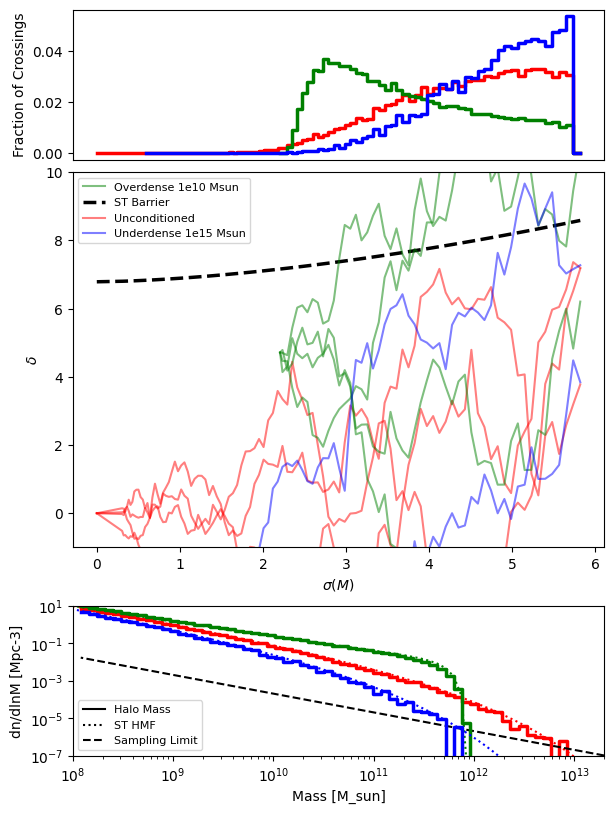

In [8]:
#now plot all three cases together
fig, ax = rw.plot_walks(
    walks=walks,
    redshift=redshift,
    mass_steps=mass_steps,
    sigma_steps=sigma_steps,
    barrier=barrier_steps_ST,
    halo_masses=halo_masses_ST,
    halo_sigma=halo_sigma_ST,
    n_walks_plot=4,
    color='r',
    delta=0.0,
    hmf_type='ST',
    label='Unconditioned'
)
fig, ax = rw.plot_walks(
    fig=fig,
    ax=ax,
    walks=walks_overdense_12,
    redshift=redshift,
    mass_steps=mass_12,
    sigma_steps=sigma_12,
    barrier=barrier_steps_ST_12,
    halo_masses=halo_masses_ST_o_12,
    halo_sigma=halo_sigma_ST_o_12,
    n_walks_plot=4,
    color='g',
    delta=1.0,
    hmf_type='ST',
    label='Overdense 1e10 Msun'
)
fig, ax = rw.plot_walks(
    fig=fig,
    ax=ax,
    walks=walks_underdense_15,
    redshift=redshift,
    mass_steps=mass_15,
    sigma_steps=sigma_15,
    barrier=barrier_steps_ST_15,
    halo_masses=halo_masses_ST_u_15,
    halo_sigma=halo_sigma_ST_u_15,
    n_walks_plot=4,
    color='b',
    delta=-0.5,
    hmf_type='ST',
    label='Underdense 1e15 Msun'
)

### Simulated Halo Catalogs

When we want create a cosmological simulation, we first define the initial conditions on a Gaussian random field with the same power spectrum used to define our sigma in the random walks, meaning each cell is a sample of a random walk starting at `sigma==delta==0`. As a result, if we condition our random walks on the density and size of each cell in an initial conditions field, the sum of our crossing points *should* converge to those resulting from unconditioned random walks. To speed things up we will use `21cmFAST` for this, which does not explicity perform the random walks, but samples from their resulting HMFs.

Number of halos: 1094144


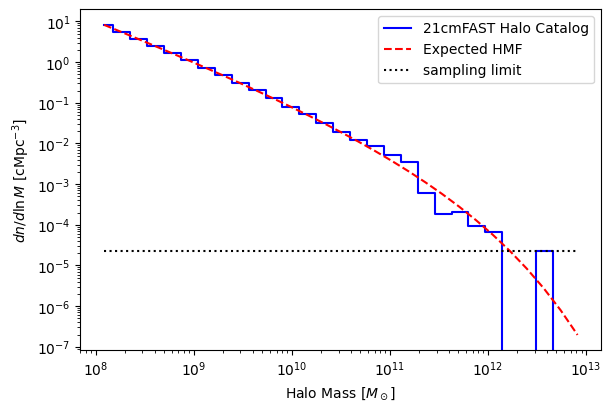

In [9]:
import py21cmfast as p21c
from matplotlib import pyplot as plt

inputs = p21c.InputParameters.from_template(["latest-dhalos","size-tiny"],random_seed=1234)
box_volume = inputs.simulation_options.BOX_LEN**3 #cMpc^3
cell_size = inputs.simulation_options.cell_size #cMpc
cell_volume = cell_size**3 #cMpc^3
mass_density = inputs.cosmo_params.cosmo.critical_density(0).to('Msun/Mpc^3').value * inputs.cosmo_params.OMm #Msun/cMpc^3

#Here we comput the initial conditions grid
ics = p21c.compute_initial_conditions(inputs=inputs)

#Here we take each cell of the initial conditions and sample from its conditional mass function, as seen above
halos = p21c.determine_halo_list(redshift=redshift, initial_conditions=ics, inputs=inputs)
print(f"Number of halos: {halos.get('n_halos')}")

#set up bins for the mass function
hm_bins = np.logspace(8,13,30)
dlnm = np.log(hm_bins[1:]) - np.log(hm_bins[:-1])
bin_centres = (hm_bins[:-1] * np.exp(dlnm/2))

fig, ax = plt.subplots(1,1,figsize=(6,4),layout='constrained')
halo_hist, _ = np.histogram(halos.get('halo_masses'), bins=hm_bins)
catalog_hmf = halo_hist / dlnm / box_volume

#This is a utility in 21cmFAST which computes the expected unconditional HMF given the inputs.
#In this case it will return the Sheth-Tormen HMF, which is what 21cmFAST uses by default.
expected_hmf = p21c.wrapper.cfuncs.return_uhmf_value(
                mass_values=bin_centres,
                redshift=redshift,
                inputs=inputs,
            ) * mass_density

#Plotting
ax.step(bin_centres, catalog_hmf, where='mid', label='21cmFAST Halo Catalog', color='b')
ax.plot(bin_centres, expected_hmf, label='Expected HMF', color='r', linestyle='--')
ax.plot(bin_centres, 1/box_volume/dlnm, label='sampling limit', color='k', linestyle=':')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'Halo Mass [$M_\odot$]')
ax.set_ylabel(r'$dn/d\ln M$ [cMpc$^{-3}$]')
_ = ax.legend()